In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
from scipy.stats import spearmanr
from scipy.stats import skew, kurtosis, norm
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.utils.validation import check_is_fitted
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.utils.validation import check_is_fitted
from sklearn.impute import SimpleImputer
import plotly.express as px
import plotly.graph_objects as go
from category_encoders import OneHotEncoder
from IPython.display import VimeoVideo
from sklearn.linear_model import LinearRegression, Ridge  



import plotly.express as px

In [2]:
def wrangle(filepath):
    # Read CSV file
    df = pd.read_csv(filepath)
    
    # Subset data: Remove outliers for "price"
    low, high = df["price"].quantile([0.1, 0.95])
    mask_area = df["price"].between(low, high)
    df = df[mask_area]
    
    return df

In [3]:
df=wrangle(r"C:\Users\Nassoh\Desktop\DataSienceMyProject\Dubai Houses\Data\Dubai.csv")
print(df.shape)
df.head(5)

(1619, 38)


,id,neighborhood,latitude,longitude,price,size_in_sqft,price_per_sqft,no_of_bedrooms,no_of_bathrooms,quality,...,private_pool,security,shared_gym,shared_pool,shared_spa,study,vastu_compliant,view_of_landmark,view_of_water,walk_in_closet
0,5528049,Palm Jumeirah,25.113208,55.138932,2700000,1079,2502.32,1,2,Medium,...,False,False,True,False,False,False,False,False,True,False
1,6008529,Palm Jumeirah,25.106809,55.151201,2850000,1582,1801.52,2,2,Medium,...,False,False,True,True,False,False,False,False,True,False
2,6034542,Jumeirah Lake Towers,25.063302,55.137728,1150000,1951,589.44,3,5,Medium,...,False,True,True,True,False,False,False,True,True,True
3,6326063,Culture Village,25.227295,55.341761,2850000,2020,1410.89,2,3,Low,...,False,False,False,False,False,False,False,False,False,False
4,6356778,Palm Jumeirah,25.114275,55.139764,1729200,507,3410.65,0,1,Medium,...,False,True,True,True,True,False,False,True,True,False


# Drob neighborhoods hvae less than 10 observation

In [5]:
df_counts = df["neighborhood"].value_counts(normalize=False).sort_values()
df_counts = df_counts[df_counts < 10]
neighborhoods_to_drop = df_counts.index
df = df.drop(df[df["neighborhood"].isin(neighborhoods_to_drop)].index)

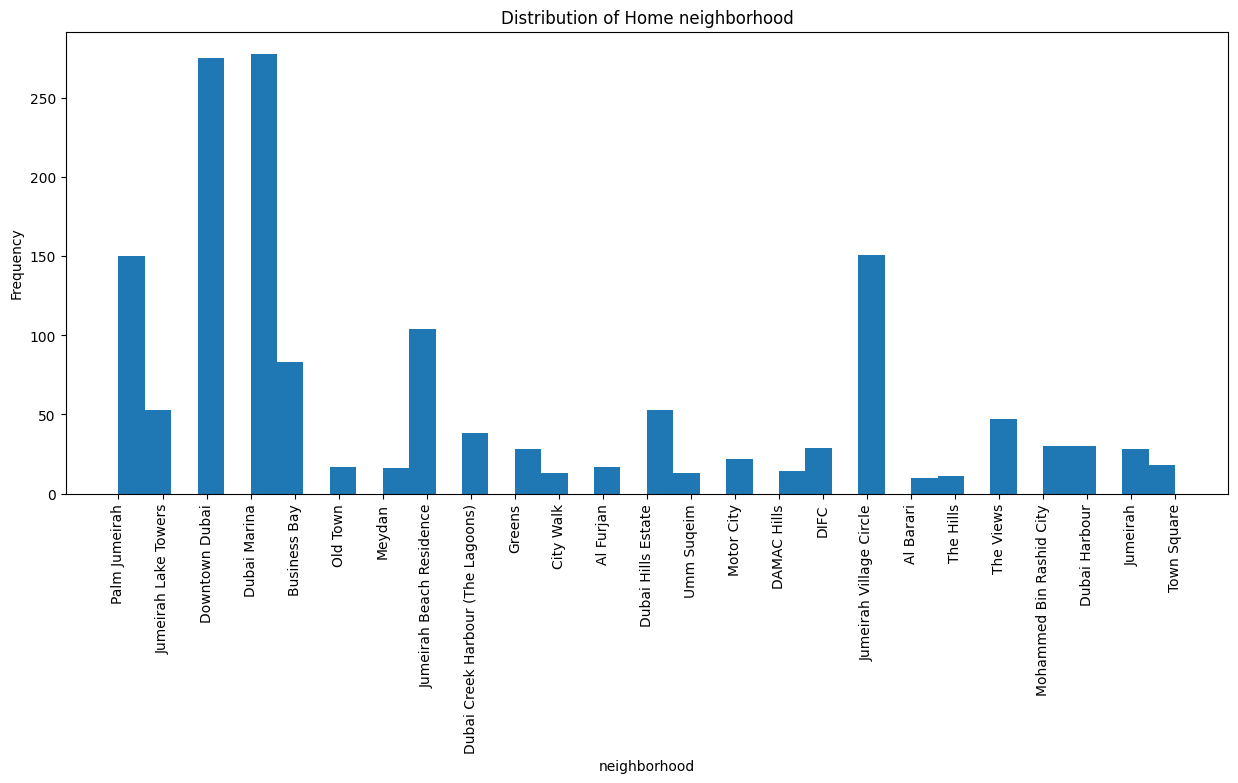

In [6]:
# create a figure with larger size
plt.figure(figsize=(15, 6))

# Build histogram
plt.hist(df["neighborhood"],40)


# Label axes

plt.xlabel("neighborhood")
plt.ylabel('Frequency')

# Add title
plt.title("Distribution of Home neighborhood")

plt.xticks(rotation='vertical')

plt.show()

# Spilt

In [7]:
target = "price"
features = ["neighborhood"]
y_train =df[target]
X_train =df[features]

# Baseline

In [11]:
y_mean =y_train.mean()
y_mean
y_pred_baseline =[y_mean]*len(y_train)
len(y_pred_baseline)
mae_baseline =mean_absolute_error(y_train,y_pred_baseline)
print("Mean apt price", round(y_mean, 2))
print("Baseline MAE:", round(mae_baseline, 2))

Mean apt price 1716131.08
Baseline MAE: 695532.96


# Build Model

In [12]:
model =make_pipeline( OneHotEncoder(use_cat_names=True),Ridge())
model.fit(X_train,y_train)

Pipeline(steps=[('onehotencoder',
                 OneHotEncoder(cols=['neighborhood'], use_cat_names=True)),
                ('ridge', Ridge())])

# Evaluate

In [13]:
y_pred_training =model.predict(X_train)
mae_training =mean_absolute_error(y_train,y_pred_training)
print("Training MAE:", round(mae_training, 2))
print("Baseline MAE:", round(mae_baseline, 2))

Training MAE: 571350.57
Baseline MAE: 695532.96


# Intercept,coefficient and Feature names For Model

In [15]:
intercept =model.named_steps['ridge'].intercept_
coefficients =model.named_steps['ridge'].coef_
feature_names =model.named_steps['onehotencoder'].get_feature_names()

# Feature names and equation For Model

In [16]:
feat_imp =pd.Series(coefficients,index=feature_names)
feat_imp
print(f"price = {intercept.round(2)}")
for f, c in feat_imp.items():
    print(f"+ ({round(c, 2)} * {f})")

price = 1670217.91
+ (468177.14 * neighborhood_Palm Jumeirah)
+ (-482539.99 * neighborhood_Jumeirah Lake Towers)
+ (512016.87 * neighborhood_Downtown Dubai)
+ (38055.76 * neighborhood_Dubai Marina)
+ (-250438.95 * neighborhood_Business Bay)
+ (170287.97 * neighborhood_Old Town)
+ (-245761.33 * neighborhood_Meydan)
+ (409193.6 * neighborhood_Jumeirah Beach Residence)
+ (147351.96 * neighborhood_Dubai Creek Harbour (The Lagoons))
+ (-459693.54 * neighborhood_Greens)
+ (1001726.15 * neighborhood_City Walk)
+ (-724988.14 * neighborhood_Al Furjan)
+ (-246617.66 * neighborhood_Dubai Hills Estate)
+ (489226.22 * neighborhood_Umm Suqeim)
+ (-717425.83 * neighborhood_Motor City)
+ (-633334.92 * neighborhood_DAMAC Hills)
+ (375122.65 * neighborhood_DIFC)
+ (-785628.94 * neighborhood_Jumeirah Village Circle)
+ (1009564.72 * neighborhood_Al Barari)
+ (655364.91 * neighborhood_The Hills)
+ (-240507.25 * neighborhood_The Views)
+ (-322581.17 * neighborhood_Mohammed Bin Rashid City)
+ (337078.92 * ne

# The following chart shows how the price change by neighborhood

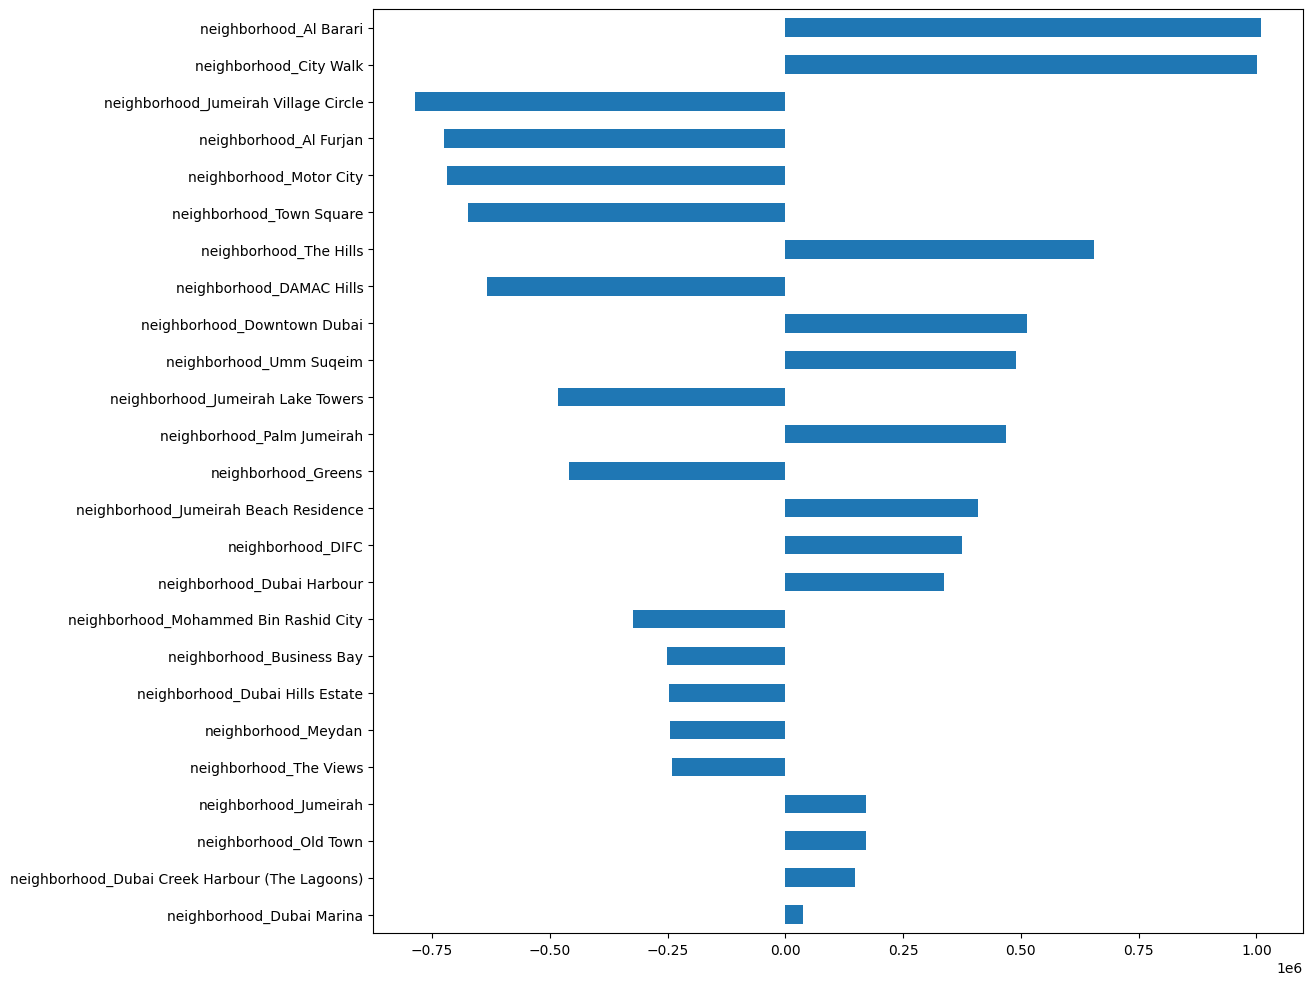

In [17]:
plt.figure(figsize=(12, 12))
feat_imp.sort_values(key=abs).plot(kind='barh')
plt.show()